# Unit 1 assessment

REMEMBER TO OPEN WHOLE FOLDER TO BE TAKEN INTO THE REPOSITORY!!! DON'T JUST OPEN THE SINGLE FILE!!!

In [1]:
import re
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import collocations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import tomotopy as tp
from tomotopy.utils import Corpus
from tomotopy.coherence import Coherence
import pyLDAvis
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/oliverhsu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/oliverhsu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/oliverhsu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
#import one novel from our corpus to test functions on
with open("data/novels/EN_1771_Mackenzie,Henry_TheManofFeeling.txt", "r") as fin:
  text = fin.read()
#print(type(text))

In [3]:
#define a function to count the words in a given text
def count_words(doc):
  doc = doc.split()
  counts = Counter(doc)
  return counts

counts = count_words(text)

In [4]:
#count unique words in text
unique_words = len(counts)
#print("Unique Words: ", unique_words)

CHECK HOW "WA" IS BEING PART OF SPEECH TAGGED. ADD "WA" TO STOPWORD LIST. CHECK IF WORDS NEED TO BE ADDED/REMOVED FROM STOPWORD LIST.

In [5]:
#lemmatization step 1. assign part of speach tags to each word

def lemmatize_pt1(doc):
    tokenized = nltk.word_tokenize(doc)
    tagged = nltk.pos_tag(tokenized)
    return tagged
tagged = lemmatize_pt1(text)

In [6]:
#lemmatization step 2. convert part of speach tag to a list of "n", "v", etc. to be able to use in nltk's lemmatize function

wordnet = nltk.corpus.wordnet


def lemmatize_pt2(doc):
    tag_list = []
    for tag in doc:
        if tag[1].startswith('J'):
            tag2 = wordnet.ADJ
            tag_list.append(tag2)
        elif tag[1].startswith('V'):
            tag2 = wordnet.VERB
            tag_list.append(tag2)
        elif tag[1].startswith('N'):
            tag2 = wordnet.NOUN
            tag_list.append(tag2)
        elif tag[1].startswith('R'):
            tag2 = wordnet.ADV
            tag_list.append(tag2)
        else:
            tag2 = ''
            tag_list.append(tag2)
    return tag_list
tags = lemmatize_pt2(tagged)

In [7]:
#lemmatization step 3. use nltk's lemmatize function to lemmatize each word
lemmatizer = WordNetLemmatizer()

text_list = text.split()
type(text_list)

def lemmatize_pt3(doc, tags):
    """
    Return: document in form of list with all words lemmatized

        Parameters:
                doc: text document that has been split into a list of words
                tags: list of part of speech tags
        Return: 
                word_list: list of lemmatized words
    """
    word_list = []
    length = len(doc)

    for i in range(length):
        word = doc[i]
        if len(tags[i]) > 0:
            lemm_word = lemmatizer.lemmatize(word, pos = tags[i])
            word_list.append(lemm_word)
        else:
            lemm_word = lemmatizer.lemmatize(word)
            word_list.append(lemm_word)
    return word_list

lemmatize_pt3(text_list, tags)


['AUTHOR’S',
 'INTRODUCTION',
 'My',
 'dog',
 'had',
 'made',
 'a',
 'point',
 'on',
 'a',
 'piece',
 'of',
 'fallow-ground,',
 'and',
 'led',
 'the',
 'curate',
 'and',
 'me',
 'two',
 'or',
 'three',
 'hundred',
 'yard',
 'over',
 'that',
 'and',
 'some',
 'stubble',
 'adjoining,',
 'in',
 'a',
 'breathless',
 'state',
 'of',
 'expectation,',
 'on',
 'a',
 'burning',
 'first',
 'of',
 'September.',
 'It',
 'be',
 'a',
 'false',
 'point,',
 'and',
 'our',
 'labour',
 'wa',
 'vain:',
 'yet,',
 'to',
 'do',
 'Rover',
 'justice',
 '(for',
 'he’s',
 'an',
 'excellent',
 'dog,',
 'though',
 'I',
 'have',
 'lost',
 'his',
 'pedigree),',
 'the',
 'fault',
 'wa',
 'none',
 'of',
 'his,',
 'the',
 'bird',
 'were',
 'gone:',
 'the',
 'curate',
 'showed',
 'me',
 'the',
 'spot',
 'where',
 'they',
 'had',
 'lain',
 'basking,',
 'at',
 'the',
 'root',
 'of',
 'an',
 'old',
 'hedge.',
 'I',
 'stop',
 'and',
 'cried',
 'Hem!',
 'The',
 'curate',
 'be',
 'fatter',
 'than',
 'I;',
 'he',
 'wiped',
 '

In [8]:
#define a function to turn the entire text into lowercase
def lowertxt(doc):
  uncasedtxt = doc.lower()
  return uncasedtxt

uncasedtxt = lowertxt(text)

In [9]:
ucounts = count_words(uncasedtxt)
unique_words = len(ucounts)
#print("Unique Words: ", unique_words)

#check to make sure text got put into all lowercase
#print("The in uncased:",("The" in uncasedtxt))

In [10]:
#define a funciton to remove pucntuation from text and turn text into a list
def nopunct(doc):
  no_punctuation = re.sub(r"[-—]", " ", doc)
  no_punctuation = re.sub(r"[^\w\s]", "", no_punctuation)
  no_punctuation = re.sub(r"_", "", no_punctuation)
  no_punctuation = re.sub(r"[0-9]", "", no_punctuation)
  cleaned_textlist = no_punctuation.split()
  return cleaned_textlist

nopuncttxt = nopunct(uncasedtxt)

In [11]:
#output 20 most common words in cleaned text
cleaned_counts = Counter(nopuncttxt)
#for entry in cleaned_counts.most_common(20):
  #print(entry)

In [12]:
#import a list of common words called a stoplist
with open("data/voyant_stoplist.txt") as fin:
  stoplist = fin.read()
  stoplist = stoplist.split()
print(stoplist)

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'b', 'back', 'be', 'because', 'been', 'before', 'beforehand', 'being', 'beside', 'besides', 'between', 'both', 'bottom', 'but', 'by', 'c', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'd', 'de', 'did', "didn't", 'do', 'does', "doesn't", "don't", 'done', 'down', 'due', 'during', 'e', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'f', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'g', 'get', 'give', 'go', 'h', 'had', 'has', 'hasnt', 'have',

In [13]:
#first 10 stoplist words
#print(stoplist[:10])

In [14]:
#define a function to remove stopwords from text
def nostopwords(doc):
  nostoplist = []
  for word in doc:
    if word in stoplist:
      continue
    else:
      nostoplist.append(word)
      continue
  return nostoplist

stoppedtxt = nostopwords(nopuncttxt)
print(stoppedtxt)

['authors', 'introduction', 'dog', 'point', 'piece', 'fallow', 'ground', 'led', 'curate', 'yards', 'stubble', 'adjoining', 'breathless', 'state', 'expectation', 'burning', 'september', 'false', 'point', 'labour', 'vain', 'rover', 'justice', 'hes', 'excellent', 'dog', 'lost', 'pedigree', 'fault', 'birds', 'gone', 'curate', 'showed', 'spot', 'lain', 'basking', 'root', 'old', 'hedge', 'stopped', 'cried', 'hem', 'curate', 'fatter', 'wiped', 'sweat', 'brow', 'state', 'apter', 'pause', 'look', 'round', 'disappointment', 'life', 'hurrying', 'impelled', 'warm', 'wish', 'looking', 'right', 'hand', 'left', 'sudden', 'gay', 'hopes', 'flown', 'slender', 'consolation', 'friend', 'point', 'lo', 'combustible', 'race', 'beat', 'heads', 'spite', 'wipe', 'brows', 'curate', 'look', 'round', 'say', 'nauseated', 'listlessness', 'king', 'israel', 'vanity', 'vexation', 'spirit', 'looked', 'round', 'grave', 'apophthegm', 'mind', 'discovered', 'time', 'venerable', 'pile', 'enclosure', 'belonged', 'air', 'melan

In [15]:
#function to perform bigram analysis on a given text (takes in a list of words)
def bigram_analysis(doc):
    finder = collocations.BigramCollocationFinder.from_words(doc)

    bigrams = finder.ngram_fd

    bigrams = [(word, pair, count) for (word, pair), count in bigrams.items()]
    bigrams = pd.DataFrame(bigrams, columns = ('word1', 'word2', 'count'))
    bigrams.sort_values('count', ascending = False, inplace = True)
    return bigrams

#print(bigram(stoppedtxt).head())

In [16]:
#view new most common words without stopwords
counts = Counter(stoppedtxt)
#print(counts)

In [17]:
#define a function to get rid of prefix/suffix type of extensions ('expectation'->'expect'). this is a more simple form of lemmatization.
stemmer = PorterStemmer()
def stemming(doc):
  stemmedtxt = []
  for word in doc:
      new_word = stemmer.stem(word)
      stemmedtxt.append(new_word)
  return stemmedtxt

stemmedtxt = stemming(stoppedtxt)
#print(stemmedtxt)

In [18]:
#define a function to turn a list of words into a string of words
def to_string(doc):
    string_text = " ".join(doc)
    return string_text

In [19]:
#load manifest
manifest = pd.read_csv("data/manifest.csv", index_col = 0)
manifest.head()
manifest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AUTHOR    150 non-null    object
 1   TITLE     150 non-null    object
 2   YEAR      150 non-null    int64 
 3   FILENAME  150 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.9+ KB


In [20]:
#create corpus by looping through manifest and adding each file by their name to the corpus
#use filepath "data/novels" since the current branch already puts us in the nlp_practice folder on desktop
start_path = Path("data/novels")
corpus = []
for text in manifest.index:
  filename = manifest.loc[text, 'FILENAME']
  path = start_path.joinpath(f"{filename}")
  with path.open('r') as fin:
    corpus.append(fin.read())
#type(corpus)

RAN CLEANING LOOP IN ABOUT 7-10 MINS. ALSO FIND HOW MANY WORDS IN CORPUS!!! ALSO HOW TO MERGE BRANCHES? WHY IS LEMMATIZING GIVING "WA" (IT IS ONE OF MOST COMMON WORDS)

In [21]:
#clean corpus and add to a new corpus called "cleaned_corpus"
cleaned_corpus = []
for text in corpus:
  lemmatize1 = lemmatize_pt1(text)
  tag = lemmatize_pt2(lemmatize1)
  text_list = text.split()
  lemmatized = lemmatize_pt3(text_list, tag)
  string_lemm = to_string(lemmatized)
  uncasedtxt = lowertxt(string_lemm)
  nopuncttxt = nopunct(uncasedtxt)
  nostoptxt = nostopwords(nopuncttxt)
  string_texts = to_string(nostoptxt)
  cleaned_corpus.append(string_texts)

END OF CORPUS CLEANING. STARTING CORPUS ANALYTICS.

In [22]:
#create DTM (contains the frequencies of all terms in a corpus)
count_vectorizer = CountVectorizer()
vectorized = count_vectorizer.fit_transform(cleaned_corpus)

#print(vectorized.shape)

In [23]:
#convert dtm to pandas dataframe
dtm = pd.DataFrame(
    vectorized.toarray(),
    columns = count_vectorizer.get_feature_names_out(),
    index = manifest['FILENAME']
)
#dtm.head()

In [24]:
#define funciton to create histogram plots using seaborn plotting
def plotting(data, col, xlabel='', ylabel='', title=''):
    fig, ax = plt.subplots()
    figure = sns.histplot(x=col, data=data)
    figure.set(title=title, xlabel=xlabel, ylabel=ylabel)

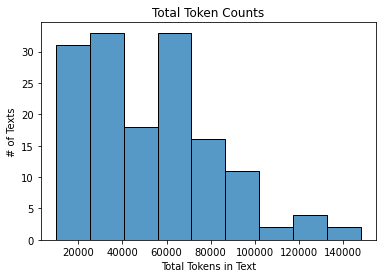

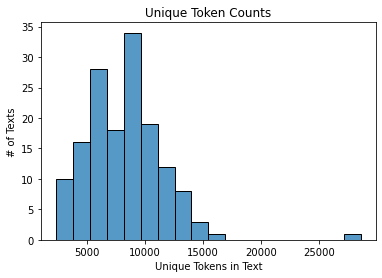

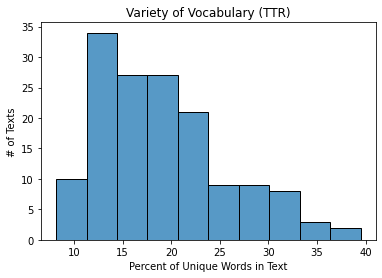

In [25]:
#making a '#TotalTokens' column in dataframe. summing up each row (each row has the counts of each word in a given text)
#'manifest.loc[:, '#TotalTokens']' is of type Series and is length 150 (this is same for all of its kind)
#'axis = 1' makes the 'apply' function sum up items in a row instead of in a column
manifest.loc[:, '#TotalTokens'] = dtm.apply(sum, axis = 1).values

#making a '#UniqueTokens' column in dataframe. applying a numpy function to count the total items that a are not value zero
manifest.loc[:, '#UniqueTokens'] = dtm.apply(np.count_nonzero, axis = 1).values

#making a 'VocabComplexity' column in dataframe. creates a ratio of unique words to total words to check diversity in words used
manifest.loc[:, 'VocabComplexity'] = (manifest['#UniqueTokens'] / manifest['#TotalTokens']) * 100


#plot the columns created above
plotting(manifest, '#TotalTokens', title='Total Token Counts', xlabel='Total Tokens in Text', ylabel='# of Texts')
plotting(manifest, '#UniqueTokens', title='Unique Token Counts', xlabel='Unique Tokens in Text', ylabel='# of Texts')
plotting(manifest, 'VocabComplexity', title='Variety of Vocabulary (TTR)', xlabel='Percent of Unique Words in Text', ylabel='# of Texts')

In [26]:
#count totals of terms in corpus (displays top 5 most used words in corpus)
term_counts = pd.DataFrame(dtm.sum(), columns=("count",))
ordered_counts = term_counts.sort_values(by="count", ascending=False)
#ordered_counts.head()

In [27]:
#hapax: a word only used once in the whole corpus
hapaxes = ordered_counts[ordered_counts['count'] == 1]
#print(hapaxes)

In [28]:
#find 5 most common word duos in the first 5 cleaned texts in corpus
bigram_list = []
x = 0

for item in cleaned_corpus[:5]:

    text = item.split(" ")

    bigrams = bigram_analysis(text)
    bigram_list.append(bigrams.head())
    x += 1

#print(bigram_list)

In [29]:
#find novel with the most words in it
#find novel with least words in it
row_sum_max = [0]
max_name = ["start"]

row_sum_min = [999999]
min_name = ["start"]

for index, row in dtm.iterrows():
    row_sum = sum(row)

    if row_sum > row_sum_max[0]:
        row_sum_max.pop(0)
        max_name.pop(0)

        row_sum_max.append(row_sum)
        max_name.append(index)

    if row_sum < row_sum_min[0]:
        row_sum_min.pop(0)
        min_name.pop(0)

        row_sum_min.append(row_sum)
        min_name.append(index)

stringed_maxname = ' '.join(max_name)
#print("The novel with the most words is", stringed_maxname,"it has",row_sum_max,"words.")

stringed_minname = ' '.join(min_name)
#print("The novel with the least words is", stringed_minname,"it has",row_sum_min,"words.")

In [30]:
#average type-token ratio (finds lexical diversity by printing average percent of unique words) 
#this means, on average, a text in our corpus will have 19% unique words - not very lexically diverse
print(manifest["VocabComplexity"].mean())

19.089590445610227


## Document Similarity
END OF CORPUS ANALYTICS. STARTING DOCUMENT SIMILARITY.

In [31]:
#Cosine-Similarity on dataframe
cos_sim = cosine_similarity(dtm)
cos_dataframe = pd.DataFrame(cos_sim, columns=dtm.index, index=dtm.index)
cos_dataframe.iloc[:3,:3]

FILENAME,"EN_1847_Bronte,Charlotte_JaneEyre.txt","EN_1811_Austen,Jane_SenseandSensibility.txt","EN_1928_Woolf,Virginia_Orlando.txt"
FILENAME,,,
"EN_1847_Bronte,Charlotte_JaneEyre.txt",1.000000,0.618843,0.665804
"EN_1811_Austen,Jane_SenseandSensibility.txt",0.618843,1.000000,0.449970
"EN_1928_Woolf,Virginia_Orlando.txt",0.665804,0.449970,1.000000


WHY TEXTS IN THE NEGATIVE REGION?

In [32]:
reducer = TSNE(
    n_components = 2,
    learning_rate = 'auto',
    init = 'random',
    angle = 0.35,
    random_state = 357,
    n_jobs = -1
)
reduced = reducer.fit_transform(cos_sim)

reduced_dataframe = pd.DataFrame({'x': reduced[:,0], 'y': reduced[:,1]})

In [33]:
#Novels list that is used to label dots in the scatter plot of cosine similarities
novels = ["EN_1847_Bronte,Charlotte_JaneEyre.txt",
"EN_1811_Austen,Jane_SenseandSensibility.txt",
"EN_1857_Trollope,Anthony_BarchesterTowers.txt",	 
"EN_1928_Woolf,Virginia_Orlando.txt", 
"EN_1922_Joyce,James_Ulysses.txt",
"EN_1847_Bronte,Emily_WutheringHeights.txt",
"EN_1906_London,Jack_WhiteFang.txt"]

In [34]:
#function to plot cosine similarities
def sim_plot(data, colors=None, dot_labels=None, num_colors=5):
    fig, ax = plt.subplots()
    custom_pal = sns.color_palette(n_colors = num_colors)
    graph = sns.scatterplot(x='x', y='y', data = data, hue=colors, palette=custom_pal)
    graph.set(xticks=[], yticks=[], xlabel="Dimension1", ylabel="Dimension2")

    if dot_labels:
        for label in dot_labels:
            text_num = manifest[manifest['FILENAME'] == label].index[0]
            ax.text(reduced_dataframe.at[text_num, 'x'], reduced_dataframe.at[text_num, 'y'], label)
            
    plt.show()

#sim_plot(data=reduced_dataframe)

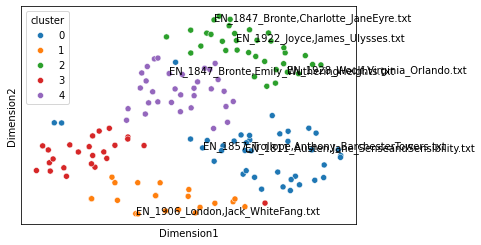

In [35]:
#plot clustered cosine similarities. clustered by sci-kit learn Agglomerative Clustering function 
num_clusters = 5
agg = AgglomerativeClustering(n_clusters = num_clusters)
agg.fit(cos_sim)

reduced_dataframe.loc[:, 'cluster'] = agg.labels_

sim_plot(data=reduced_dataframe, colors="cluster", dot_labels=novels)

In [36]:
"""
initially used this corpus, but it is uncleaned, so not as good
manifest = pd.read_csv("data/manifest.csv", index_col = 0)

start_path = Path("data/novels")
corpus_new = Corpus()

for filename in manifest['FILENAME']:
    path = start_path.joinpath(f"{filename}")
    with path.open("r") as fin:
        doc = fin.read()
        corpus_new.add_doc(doc.split())
"""

'\ninitially used this corpus, but it is uncleaned, so not as good\nmanifest = pd.read_csv("data/manifest.csv", index_col = 0)\n\nstart_path = Path("data/novels")\ncorpus_new = Corpus()\n\nfor filename in manifest[\'FILENAME\']:\n    path = start_path.joinpath(f"{filename}")\n    with path.open("r") as fin:\n        doc = fin.read()\n        corpus_new.add_doc(doc.split())\n'

## Topic Modeling

In [37]:
#make clean corpus of type tomotopy Corpus to do tomotopy analysis on
cleaned_corpus_new= Corpus()

for text in cleaned_corpus:
    cleaned_corpus_new.add_doc(text.split())

#first topic model with X number of topics
num_topics = 3
set_seed = 400

model1 = tp.LDAModel(k=num_topics, corpus=cleaned_corpus_new, seed = set_seed)

train_times = 300
model1.train(train_times)

/var/folders/4z/rsv4xcbs0cq85ktlnbq56_s40000gn/T/ipykernel_6016/2805769307.py:14: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  model1.train(train_times)


In [38]:
#function to fint which words are most highly correlated with each topic
def correlated_words(model, topic_num):
    words = model.get_topic_words(topic_id=topic_num, top_n=5)
    printout = [f"Topic{topic_num}: {words}"]
    return printout

for topic in range(model1.k):
    print(correlated_words(model1, topic))

["Topic0: [('mr', 0.00792277604341507), ('lady', 0.004942684434354305), ('mrs', 0.004599100444465876), ('time', 0.004200666211545467), ('ha', 0.003892826847732067)]"]
["Topic1: [('like', 0.006858807522803545), ('know', 0.0066823456436395645), ('little', 0.006610668729990721), ('come', 0.006279930472373962), ('say', 0.006056366488337517)]"]
["Topic2: [('man', 0.006067723035812378), ('like', 0.004927217960357666), ('men', 0.004172443877905607), ('hand', 0.003831640351563692), ('time', 0.0036147069185972214)]"]


HOW TO TELL IF NUMBER OF TOPICS IS APPROPRIATE? LOOK BACK AT READER FOR MORE INFO. ADD TITLES TO ORGANIZE THIS DOC (use ##).

WHAT ARE THESE TOPICS? 

In [39]:
#Topic Probability Distribution for each text (how much each text is related to each topic)
def find_relation(model, text):
    relation = np.stack([doc.get_topic_dist() for doc in model.docs])
    relation_matrix = pd.DataFrame(relation, index = text)
    return relation_matrix

matrix = find_relation(model1, manifest['FILENAME'])
print(matrix)

                                                       0         1         2
FILENAME                                                                    
EN_1847_Bronte,Charlotte_JaneEyre.txt           0.472185  0.390296  0.137519
EN_1811_Austen,Jane_SenseandSensibility.txt     0.936407  0.062686  0.000907
EN_1928_Woolf,Virginia_Orlando.txt              0.208282  0.341230  0.450488
EN_1798_Wollstonecraft,Mary_Maria.txt           0.879118  0.056111  0.064771
EN_1813_Austen,Jane_PrideandPrejudice.txt       0.962018  0.036548  0.001433
...                                                  ...       ...       ...
EN_1897_Stoker,Bram_Dracula.txt                 0.198452  0.533501  0.268047
EN_1809_More,Hannah_CoelebsinSearchofaWife.txt  0.887932  0.061142  0.050926
EN_1854_Gaskell,Elizabeth_NorthandSouth.txt     0.319627  0.641969  0.038404
EN_1847_Aguilar,Grace_HomeInfluence.txt         0.828753  0.150825  0.020422
EN_1857_Trollope,Anthony_BarchesterTowers.txt   0.588641  0.364574  0.046785

In [40]:
#words per topic
topic_word_counts = model1.get_count_by_topics()

counter = 1
for count in topic_word_counts:
    print(f"Topic {counter} has {count} words.")
    counter += 1

Topic 1 has 3244171 words.
Topic 2 has 2928780 words.
Topic 3 has 1557051 words.
